This notebook scans for labelled audio samples in a directory,
extracts the spectrum of the samples and creates dataset files
with the spectrum data to train the audio detection model.

In [1]:
import os

from micmon.audio import AudioDirectory, AudioPlayer, AudioFile
from micmon.dataset import DatasetWriter

basedir = os.path.expanduser(os.path.join('~', 'projects', 'baby-monitor'))
audio_dir = os.path.join(basedir, 'data', 'audio')
datasets_dir = os.path.join(basedir, 'data', 'datasets')
audio_dirs = AudioDirectory.scan(audio_dir)
cutoff_frequencies = [250, 7500]

DEBUG:matplotlib:(private) matplotlib data path: /usr/lib/python3.8/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:matplotlib data path: /usr/lib/python3.8/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/blacklight/.config/matplotlib
DEBUG:matplotlib:matplotlib version 3.3.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_frozen_importlib_external', '_io', 'marshal', 'posix', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', 'importlib.abc', '_operator', 'operator', 'keyword', '

Play some audio samples

In [3]:
for audio in audio_dirs:
    with AudioFile(audio, start='19:40', duration=10) as reader, \
            AudioPlayer() as player:
        for sample in reader:
            player.play(sample)

Plot the spectrum of the audio samples in the first 10 seconds of each audio file.

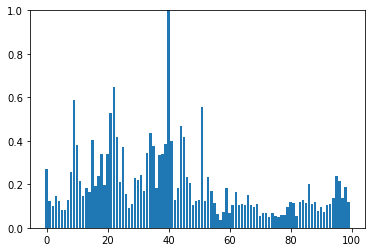

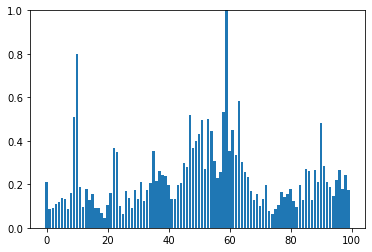

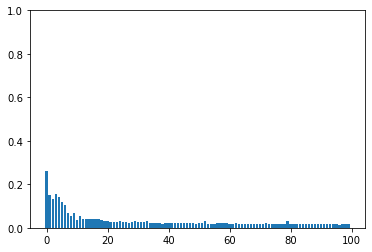

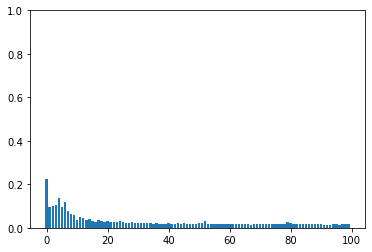

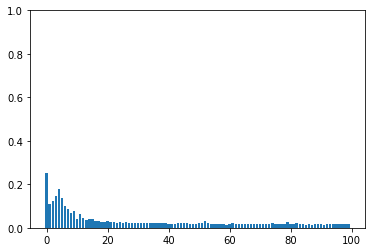

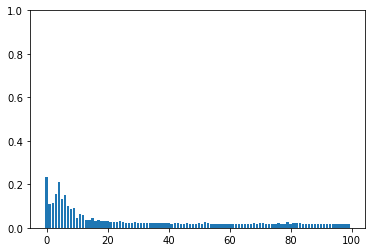

In [2]:
for audio in audio_dirs:
    with AudioFile(audio, start=0, duration=4) as reader:
        for sample in reader:
            sample.plot_spectrum(low_freq=cutoff_frequencies[0],
                                 high_freq=cutoff_frequencies[1])

Save the spectrum information and labels of the samples to a
different compressed file for each audio file.

In [2]:
for audio in audio_dirs:
    dataset_file = os.path.join(datasets_dir, os.path.basename(audio.path) + '.npz')
    print(f'Processing audio sample {audio.path}')

    with AudioFile(audio) as reader, \
            DatasetWriter(dataset_file,
                          low_freq=cutoff_frequencies[0],
                          high_freq=cutoff_frequencies[1]) as writer:
        for sample in reader:
            writer += sample

Processing audio sample /home/blacklight/projects/baby-monitor/data/audio/2020-10-25_16-36-00
Processing audio sample /home/blacklight/projects/baby-monitor/data/audio/2020-10-24_19-53-00
Processing audio sample /home/blacklight/projects/baby-monitor/data/audio/2020-10-24_17-25-00
